# Pivoted full data

En este documento se crean las tablas para las predicciones.

In [4]:
import polars as pl

PATH = "data/cephalosporines_clean/"

## Full data

In [5]:
df = pl.read_parquet(PATH + "pivoted_full_data.parquet")
df.head()

REPORT_ID,AGE_Y,WEIGHT_KG,HEIGHT_CM,GENDER_CODE,furosemide,chlorpromazine,cephalothin,chlordiazepoxide hydrochloride,fursemide,hydralazine hydrochloride,frusemide,cefalotin,hydralazine hcl,methaminodiazepoxide hcl,chlorpramazine,gentamicin sulfate,erythromycin,gentamycin sulfate,"gentamicin, sulfate",erythromycin gluceptate,erythromycin cyclocarbonate,erythromycin acistrate,erythromycin oxime,gentamicin sulphate,erythromycin salt not specified,erythromycin stinoprate,gentamicine (sulfate de),guaifenesin,dextropropoxyphene hydrochloride,cephalexin,propoxyphene hcl,acetylsalicylic acid,caffeine,methyltheobromine,methylol cefalexin lysinate,aspirin,…,prunus cerasus extract,prunus cerasus root,prunus cerasus bark,cilgavimab,tixagevimab,daratumumab (humax-cd38),sigvotatug vedotin,cephalosporin nos,ravulizumab,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Skin and subcutaneous tissue disorders,Renal and urinary disorders,General disorders and administration site conditions,Vascular disorders,Investigations,Nervous system disorders,Infections and infestations,Ear and labyrinth disorders,Psychiatric disorders,Blood and lymphatic system disorders,Immune system disorders,"Respiratory, thoracic and mediastinal disorders",Cardiac disorders,Hepatobiliary disorders,Metabolism and nutrition disorders,"Injury, poisoning and procedural complications",Reproductive system and breast disorders,Surgical and medical procedures,"Pregnancy, puerperium and perinatal conditions","Neoplasms benign, malignant and unspecified (incl cysts and polyps)","Congenital, familial and genetic disorders",Endocrine disorders,Social circumstances,Product issues,
i64,f64,f64,f64,i32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
164,68.0,47.0,173.0,0,1,1,2,2,1,1,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
173,42.0,82.0,180.0,0,0,0,2,0,0,0,0,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
180,29.0,null,null,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,…,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
346,null,null,null,1,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
356,21.0,60.0,null,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
soc_cols = [
    "Blood and lymphatic system disorders",
    "Cardiac disorders",
    "Congenital, familial and genetic disorders",
    "Ear and labyrinth disorders",
    "Endocrine disorders",
    "Eye disorders",
    "Gastrointestinal disorders",
    "General disorders and administration site conditions",
    "Hepatobiliary disorders",
    "Immune system disorders",
    "Infections and infestations",
    "Injury, poisoning and procedural complications",
    "Investigations",
    "Metabolism and nutrition disorders",
    "Musculoskeletal and connective tissue disorders",
    "Neoplasms benign, malignant and unspecified (incl cysts and polyps)",
    "Nervous system disorders",
    "Pregnancy, puerperium and perinatal conditions",
    "Product issues",
    "Psychiatric disorders",
    "Renal and urinary disorders",
    "Reproductive system and breast disorders",
    "Respiratory, thoracic and mediastinal disorders",
    "Skin and subcutaneous tissue disorders",
    "Social circumstances",
    "Surgical and medical procedures",
    "Vascular disorders",
]


In [7]:
import polars as pl

df_bin = df.with_columns([
    (pl.col(c) > 0).cast(pl.Int8).alias(c) for c in soc_cols
])


In [8]:
all_cols = df_bin.columns

feature_cols = [
    c for c in all_cols
    if c not in soc_cols and c != "REPORT_ID"
]

# Polars → pandas for scikit-learn
pdf = df_bin.to_pandas()

X = pdf[feature_cols]
Y = pdf[soc_cols]


In [9]:
df = None
pdf = None

In [10]:
Y

,Blood and lymphatic system disorders,Cardiac disorders,"Congenital, familial and genetic disorders",Ear and labyrinth disorders,Endocrine disorders,Eye disorders,Gastrointestinal disorders,General disorders and administration site conditions,Hepatobiliary disorders,Immune system disorders,...,"Pregnancy, puerperium and perinatal conditions",Product issues,Psychiatric disorders,Renal and urinary disorders,Reproductive system and breast disorders,"Respiratory, thoracic and mediastinal disorders",Skin and subcutaneous tissue disorders,Social circumstances,Surgical and medical procedures,Vascular disorders
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17850,0,0,0,1,0,0,1,1,0,1,...,0,0,0,0,0,1,1,0,0,0
17851,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
17852,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [11]:
X

,AGE_Y,WEIGHT_KG,HEIGHT_CM,GENDER_CODE,furosemide,chlorpromazine,cephalothin,chlordiazepoxide hydrochloride,fursemide,hydralazine hydrochloride,...,prunus cerasus extract,prunus cerasus root,prunus cerasus bark,cilgavimab,tixagevimab,daratumumab (humax-cd38),sigvotatug vedotin,cephalosporin nos,ravulizumab,
0,68.0,47.0,173.0,0,1,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
1,42.0,82.0,180.0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29.0,NaN,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21.0,60.0,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17849,19.0,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17850,59.0,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17851,19.0,NaN,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17852,44.0,NaN,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# COUNT THE NUMBER OF NANS IN AGE_Y	WEIGHT_KG	HEIGHT_CM	GENDER_CODE
X.isna().sum()

AGE_Y                        1333
WEIGHT_KG                   10762
HEIGHT_CM                   13020
GENDER_CODE                     0
furosemide                      0
                            ...  
daratumumab (humax-cd38)        0
sigvotatug vedotin              0
cephalosporin nos               0
ravulizumab                     0
                                0
Length: 9093, dtype: int64

In [13]:
# FILL NANS WITH MEDIAN FOR AGE_Y, WEIGHT_KG, HEIGHT_CM
X['AGE_Y'].fillna(X['AGE_Y'].median(), inplace=True)
X['WEIGHT_KG'].fillna(X['WEIGHT_KG'].median(), inplace=True)
X['HEIGHT_CM'].fillna(X['HEIGHT_CM'].median(), inplace=True)

C:\Users\herie\AppData\Local\Temp\ipykernel_19844\1869391243.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['AGE_Y'].fillna(X['AGE_Y'].median(), inplace=True)
C:\Users\herie\AppData\Local\Temp\ipykernel_19844\1869391243.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [14]:
# COUNT THE NUMBER OF NANS IN AGE_Y	WEIGHT_KG	HEIGHT_CM	GENDER_CODE
X.isna().sum()

AGE_Y                       0
WEIGHT_KG                   0
HEIGHT_CM                   0
GENDER_CODE                 0
furosemide                  0
                           ..
daratumumab (humax-cd38)    0
sigvotatug vedotin          0
cephalosporin nos           0
ravulizumab                 0
                            0
Length: 9093, dtype: int64

In [15]:
# view the type of X
X.dtypes

AGE_Y                       float64
WEIGHT_KG                   float64
HEIGHT_CM                   float64
GENDER_CODE                   int32
furosemide                   uint32
                             ...   
daratumumab (humax-cd38)     uint32
sigvotatug vedotin           uint32
cephalosporin nos            uint32
ravulizumab                  uint32
                              int32
Length: 9093, dtype: object

In [16]:
# view the float columns
X.select_dtypes(include=['float']).dtypes

AGE_Y        float64
WEIGHT_KG    float64
HEIGHT_CM    float64
dtype: object

In [17]:
# # multiply the float columns by 100 and convert to uint32
# float_cols = X.select_dtypes(include=['float']).columns
# X[float_cols] = (X[float_cols] * 1000000).astype('uint32')
# X.select_dtypes(include=['uint32']).dtypes

In [18]:
# uint32 vs int8 memory usage
# uint32 uses 4 bytes per value, int8 uses 1 byte per value
# so converting float to uint32 is better than leaving as float. int8 goes from -128 to 127, uint32 goes from 0 to 4,294,967,295 (for example, if the number is 300, in int8 it would overflow, but in uint32 it would be fine and they both use less memory than float)
X.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17854 entries, 0 to 17853
Columns: 9093 entries, AGE_Y to 
dtypes: float64(3), int32(2), uint32(9088)
memory usage: 619.5 MB


In [19]:
# make all of them, except AGE_Y, WEIGHT_KG, HEIGHT_CM int8
int8_cols = [c for c in X.columns if c not in ['AGE_Y', 'WEIGHT_KG', 'HEIGHT_CM']]
X[int8_cols] = X[int8_cols].astype('int8')
X.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17854 entries, 0 to 17853
Columns: 9093 entries, AGE_Y to 
dtypes: float64(3), int8(9090)
memory usage: 155.2 MB


In [20]:
X

,AGE_Y,WEIGHT_KG,HEIGHT_CM,GENDER_CODE,furosemide,chlorpromazine,cephalothin,chlordiazepoxide hydrochloride,fursemide,hydralazine hydrochloride,...,prunus cerasus extract,prunus cerasus root,prunus cerasus bark,cilgavimab,tixagevimab,daratumumab (humax-cd38),sigvotatug vedotin,cephalosporin nos,ravulizumab,
0,68.0,47.0,173.0,0,1,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
1,42.0,82.0,180.0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29.0,66.0,163.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,55.0,66.0,163.0,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21.0,60.0,163.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17849,19.0,66.0,163.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17850,59.0,66.0,163.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17851,19.0,66.0,163.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17852,44.0,66.0,163.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X.memory_usage(deep=True)

Index                          132
AGE_Y                       142832
WEIGHT_KG                   142832
HEIGHT_CM                   142832
GENDER_CODE                  17854
                             ...  
daratumumab (humax-cd38)     17854
sigvotatug vedotin           17854
cephalosporin nos            17854
ravulizumab                  17854
                             17854
Length: 9094, dtype: int64

In [22]:
for col in X.columns:
    print(col)


AGE_Y
WEIGHT_KG
HEIGHT_CM
GENDER_CODE
furosemide
chlorpromazine
cephalothin
chlordiazepoxide hydrochloride
fursemide
hydralazine hydrochloride
frusemide
cefalotin
hydralazine hcl
methaminodiazepoxide hcl
chlorpramazine
gentamicin sulfate
erythromycin
gentamycin sulfate
gentamicin, sulfate
erythromycin gluceptate
erythromycin cyclocarbonate
erythromycin acistrate
erythromycin oxime
gentamicin sulphate
erythromycin salt not specified
erythromycin stinoprate
gentamicine (sulfate de)
guaifenesin
dextropropoxyphene hydrochloride
cephalexin
propoxyphene hcl
acetylsalicylic acid
caffeine
methyltheobromine
methylol cefalexin lysinate
aspirin
asa
acetylsalicylsyre
acetylsalicyilic acid
guaranine
acetylsalicylate potassium
aspirin coated
guaiacol glyceryl ether
guaifenesinum
acetylsalicylsyra
acetylicsalicylic acid
guaiphenesin
cefalexin
methyltheophylline
trimethylxanthine
acetylsalicylicum acidum
acetylsalcylic acid
guaiacyl glyceryl ether
glyceryl guaiacolate
propoxyphene hydrochloride
acetyl

In [23]:
a = 2

In [25]:

# save the columns to a csv file
X.columns.to_series().to_csv("feature_columns.csv", index=False)

In [35]:
len(X.columns)

9093

# Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0, stratify=Y.sum(axis=1) > 0
)

base = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),   # works with sparse-like data
    ("clf", LogisticRegression(
        max_iter=1000,
        n_jobs=-1,
        class_weight="balanced"
    )),
])


In [20]:
multi_clf = MultiOutputClassifier(base, n_jobs=-1)
multi_clf.fit(X_train, Y_train)

,estimator,Pipeline(step... n_jobs=-1))])
,n_jobs,-1
,copy,True
,with_mean,False
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1


In [23]:

X_new = X[:10]
X_new

,AGE_Y,WEIGHT_KG,HEIGHT_CM,GENDER_CODE,furosemide,chlorpromazine,cephalothin,chlordiazepoxide hydrochloride,fursemide,hydralazine hydrochloride,...,prunus cerasus extract,prunus cerasus root,prunus cerasus bark,cilgavimab,tixagevimab,daratumumab (humax-cd38),sigvotatug vedotin,cephalosporin nos,ravulizumab,
0,68.0,47.0,173.0,0,1,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
1,42.0,82.0,180.0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29.0,66.0,163.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,55.0,66.0,163.0,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21.0,60.0,163.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,72.0,66.0,163.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,48.0,83.0,178.0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,75.0,66.0,163.0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,23.0,66.0,163.0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,61.0,66.0,163.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
Y[:10]

,Blood and lymphatic system disorders,Cardiac disorders,"Congenital, familial and genetic disorders",Ear and labyrinth disorders,Endocrine disorders,Eye disorders,Gastrointestinal disorders,General disorders and administration site conditions,Hepatobiliary disorders,Immune system disorders,...,"Pregnancy, puerperium and perinatal conditions",Product issues,Psychiatric disorders,Renal and urinary disorders,Reproductive system and breast disorders,"Respiratory, thoracic and mediastinal disorders",Skin and subcutaneous tissue disorders,Social circumstances,Surgical and medical procedures,Vascular disorders
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
import numpy as np

# list of arrays, one per SOC: shape (n_val, 2)
val_proba_list = [est.predict_proba(X_test) for est in multi_clf.estimators_]

# keep P(Y_k=1 | X)
val_proba_mat = np.column_stack([p[:, 1] for p in val_proba_list])

# default threshold 0.5
Y_val_pred = (val_proba_mat >= 0.5).astype("int8")


# Metricas

In [1]:
import polars as pl
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import (
    f1_score,
    hamming_loss,
    jaccard_score,
    roc_auc_score,
)
import joblib

In [ ]:
artifact = {
    "model": multi_clf,
    "feature_cols": feature_cols,
    "soc_cols": soc_cols,
}

# and compress it 
joblib.dump(artifact, "soc_multilabel_logreg.joblib", compress=3)
print("Saved to soc_multilabel_logreg.joblib")


Saved to soc_multilabel_logreg.joblib


## Uploading the model

In [26]:
# read the model
artifact = joblib.load("models/03_03_01_soc_multilabel_logreg.joblib")
multi_clf = artifact["model"]
feature_cols = artifact["feature_cols"]
soc_cols = artifact["soc_cols"]

In [39]:
report = X[:1]
report

,AGE_Y,WEIGHT_KG,HEIGHT_CM,GENDER_CODE,furosemide,chlorpromazine,cephalothin,chlordiazepoxide hydrochloride,fursemide,hydralazine hydrochloride,...,prunus cerasus extract,prunus cerasus root,prunus cerasus bark,cilgavimab,tixagevimab,daratumumab (humax-cd38),sigvotatug vedotin,cephalosporin nos,ravulizumab,
0,68.0,47.0,173.0,0,1,1,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
def predict_soc(report):
    # plot them
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scripts import style
    style.mpl_apply()

    # test for report1
    proba_list = [est.predict_proba(report) for est in multi_clf.estimators_]
    # to dataframe
    proba_list_df = pd.DataFrame(
        {soc: proba[:, 1] for soc, proba in zip(soc_cols, proba_list)}
    )

    print(proba_list_df.T.round(4))

    proba_list_df.T.plot.bar(figsize=(18, 6))
    plt.ylabel("Predicted Probability")
    plt.xlabel("SOC")
    plt.title("Predicted Probabilities")

    # add text if the value is > 0.00001
    for i, v in enumerate(proba_list_df.T[0]):
        if v > 0.0001:
            plt.text(i, v + 0.02, f"{round(v*100, 2):.2f}", ha='center', va='bottom', fontsize=10)

    plt.ylim(0, 1)
    plt.show()

                                                         0
Blood and lymphatic system disorders                0.0000
Cardiac disorders                                   0.0000
Congenital, familial and genetic disorders          0.0000
Ear and labyrinth disorders                         0.0002
Endocrine disorders                                 0.0000
Eye disorders                                       0.9109
Gastrointestinal disorders                          0.0412
General disorders and administration site condi...  0.2473
Hepatobiliary disorders                             0.0000
Immune system disorders                             0.0008
Infections and infestations                         0.0939
Injury, poisoning and procedural complications      0.0000
Investigations                                      0.0006
Metabolism and nutrition disorders                  0.0000
Musculoskeletal and connective tissue disorders     0.0000
Neoplasms benign, malignant and unspecified (in...  0.00

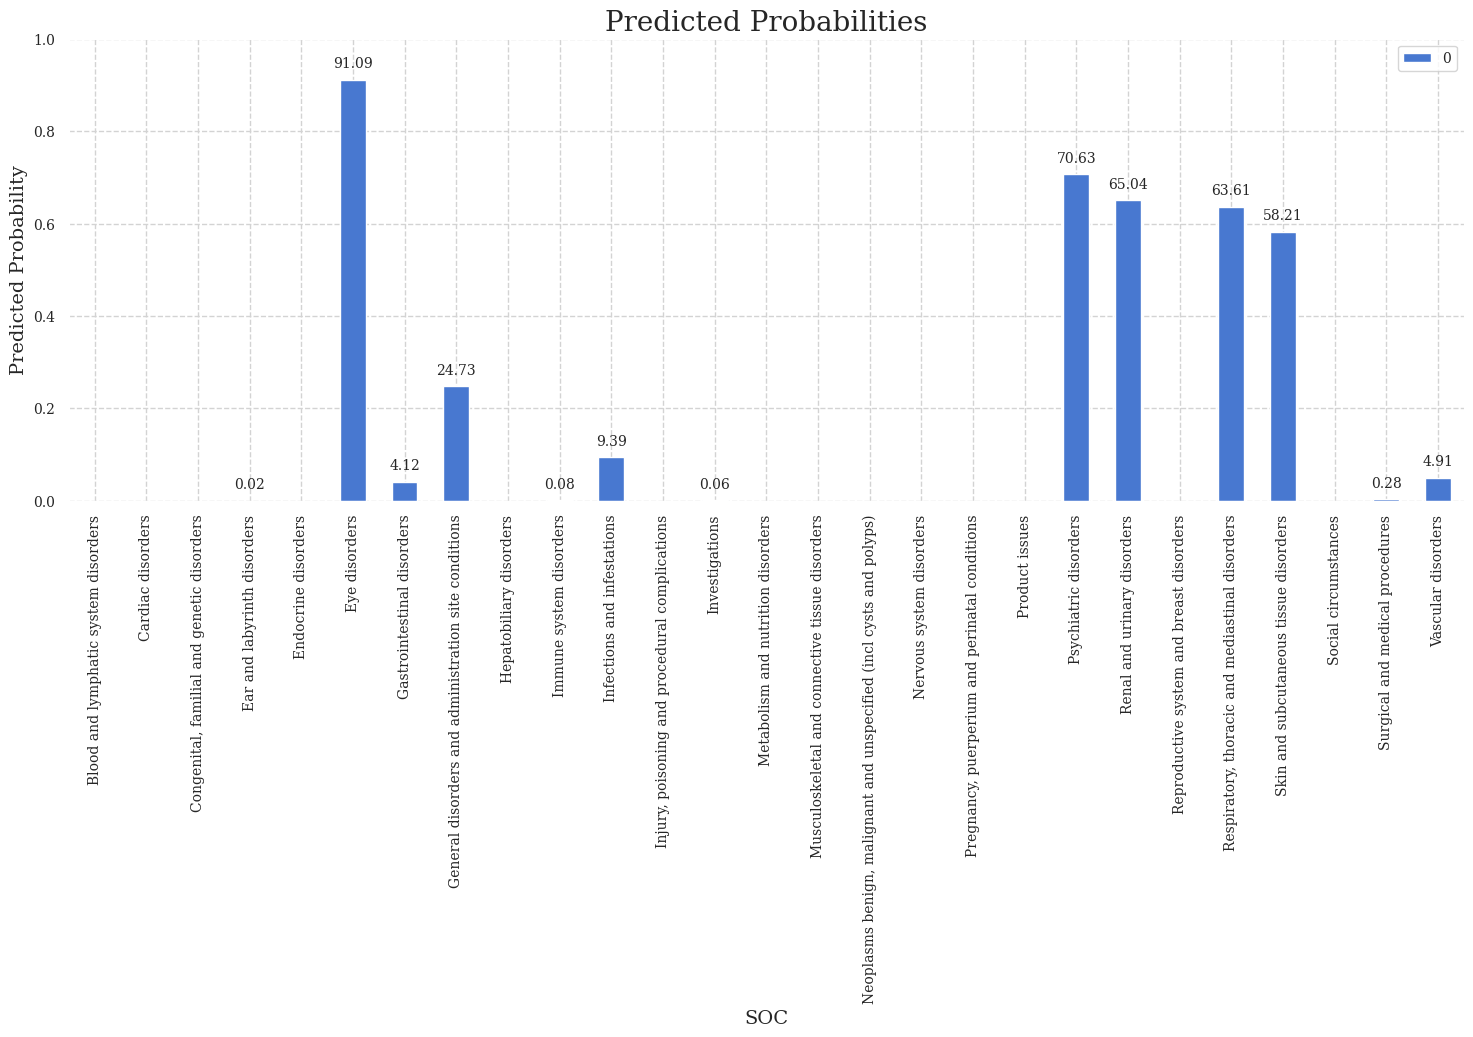

In [59]:
predict_soc(report)

In [31]:
Y_val = Y_test

print("Validation Hamming loss:", hamming_loss(Y_val, Y_val_pred))
print("Validation F1 micro:", f1_score(Y_val, Y_val_pred, average="micro"))
print("Validation F1 macro:", f1_score(Y_val, Y_val_pred, average="macro"))
print("Validation Jaccard (samples):",
      jaccard_score(Y_val, Y_val_pred, average="samples"))

# ROC-AUC (may fail if some labels are all 0 or 1)
try:
    auc_macro = roc_auc_score(Y_val, val_proba_mat, average="macro")
    auc_micro = roc_auc_score(Y_val, val_proba_mat, average="micro")
    print("Validation ROC-AUC macro:", auc_macro)
    print("Validation ROC-AUC micro:", auc_micro)
except ValueError as e:
    print("ROC-AUC not defined for some labels:", e)


Validation Hamming loss: 0.14545152825746496
Validation F1 micro: 0.4130744119862727
Validation F1 macro: 0.30347625893432173
Validation Jaccard (samples): 0.29564503432243255
Validation ROC-AUC macro: 0.6918680807933278
Validation ROC-AUC micro: 0.7970459347314119


In [32]:
Y_val_arr = Y_val.to_numpy()

for j, soc in enumerate(soc_cols):
    y_true = Y_val_arr[:, j]
    y_pred = Y_val_pred[:, j]
    prevalence = y_true.mean()

    if y_true.sum() == 0:
        # no positives in val set
        print(f"{soc:60s}  prevalence=0.0000  (no positives in val)")
        continue

    f1 = f1_score(y_true, y_pred)
    print(f"{soc:60s}  prevalence={prevalence:.4f}  F1={f1:.3f}")


Blood and lymphatic system disorders                          prevalence=0.0955  F1=0.349
Cardiac disorders                                             prevalence=0.0605  F1=0.236
Congenital, familial and genetic disorders                    prevalence=0.0039  F1=0.233
Ear and labyrinth disorders                                   prevalence=0.0196  F1=0.212
Endocrine disorders                                           prevalence=0.0048  F1=0.208
Eye disorders                                                 prevalence=0.0465  F1=0.171
Gastrointestinal disorders                                    prevalence=0.2061  F1=0.404
General disorders and administration site conditions          prevalence=0.3145  F1=0.537
Hepatobiliary disorders                                       prevalence=0.0255  F1=0.136
Immune system disorders                                       prevalence=0.0907  F1=0.346
Infections and infestations                                   prevalence=0.2025  F1=0.535
Injury, po

In [36]:
import numpy as np
from sklearn.metrics import (
    f1_score,
    hamming_loss,
    jaccard_score,
    roc_auc_score,
)

# Y_val is a pandas DataFrame, shape (n_val, n_socs)
Y_val_arr = Y_val.to_numpy()

# val_proba_list = [est.predict_proba(X_val) for est in multi_clf.estimators_]
val_proba_mat = np.column_stack([p[:, 1] for p in val_proba_list])

# predicted labels with threshold 0.5
Y_val_pred = (val_proba_mat >= 0.5).astype("int8")

# global metrics
hl = hamming_loss(Y_val_arr, Y_val_pred)
f1_micro = f1_score(Y_val_arr, Y_val_pred, average="micro")
f1_macro = f1_score(Y_val_arr, Y_val_pred, average="macro")
jacc = jaccard_score(Y_val_arr, Y_val_pred, average="samples")

# ROC-AUC
try:
    auc_macro = roc_auc_score(Y_val_arr, val_proba_mat, average="macro")
    auc_micro = roc_auc_score(Y_val_arr, val_proba_mat, average="micro")
except ValueError:
    auc_macro, auc_micro = np.nan, np.nan


In [42]:
from scripts import style
style.mpl_apply()

C:\Users\175199\AppData\Local\Temp\ipykernel_100528\295041683.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(metric_names, rotation=45, ha="right")


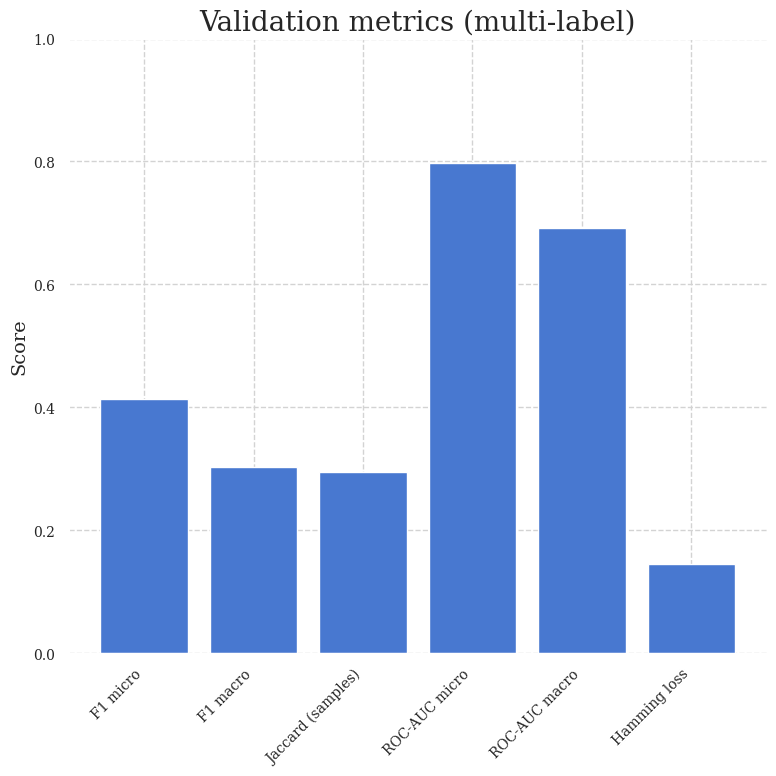

In [50]:
import matplotlib.pyplot as plt

metric_names = [
    "F1 micro",
    "F1 macro",
    "Jaccard (samples)",
    "ROC-AUC micro",
    "ROC-AUC macro",
    "Hamming loss",
]

metric_values = [
    f1_micro,
    f1_macro,
    jacc,
    auc_micro,
    auc_macro,
    hl,
]

fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(metric_names, metric_values)
ax.set_ylabel("Score")
ax.set_title("Validation metrics (multi-label)")
ax.set_xticklabels(metric_names, rotation=45, ha="right")
ax.set_ylim(0, 1)  # Hamming loss is also in [0,1]
plt.tight_layout()
plt.show()


In [38]:
from sklearn.metrics import f1_score

n_labels = len(soc_cols)
prevalence = Y_val_arr.mean(axis=0)  # shape (n_socs,)

f1_per_soc = np.zeros(n_labels)
for j in range(n_labels):
    y_true = Y_val_arr[:, j]
    y_pred = Y_val_pred[:, j]
    if y_true.sum() == 0:
        f1_per_soc[j] = np.nan  # no positives → F1 undefined
    else:
        f1_per_soc[j] = f1_score(y_true, y_pred)


In [39]:
# indices sorted by prevalence (descending)
idx = np.argsort(prevalence)[::-1]

sorted_soc_names = np.array(soc_cols)[idx]
sorted_prevalence = prevalence[idx]
sorted_f1 = f1_per_soc[idx]


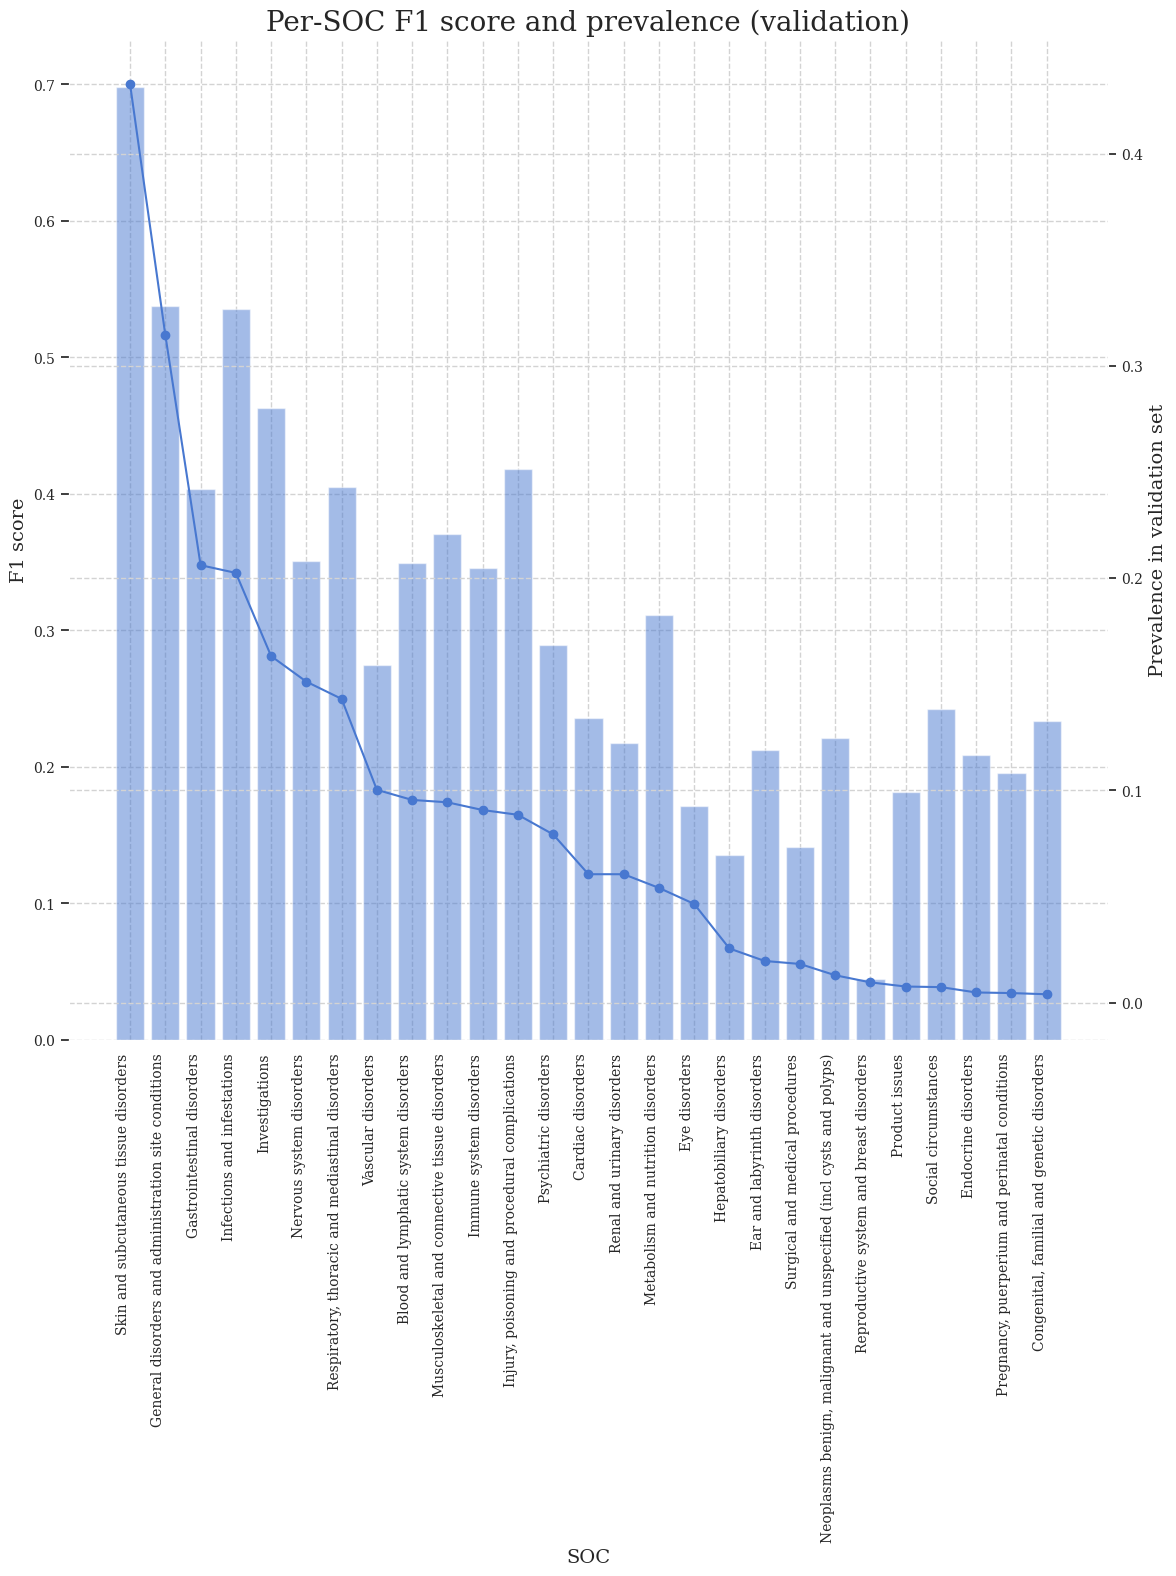

In [48]:
fig, ax1 = plt.subplots(figsize=(12, 16))

x = np.arange(len(sorted_soc_names))

# bar = F1 per SOC
ax1.bar(x, sorted_f1, alpha=0.5)
ax1.set_ylabel("F1 score")
ax1.set_xlabel("SOC")
ax1.set_title("Per-SOC F1 score and prevalence (validation)")
ax1.set_xticks(x)
ax1.set_xticklabels(sorted_soc_names, rotation=90, ha="right")

# second axis = prevalence line
ax2 = ax1.twinx()
ax2.plot(x, sorted_prevalence, marker="o")
ax2.set_ylabel("Prevalence in validation set")

plt.tight_layout()
plt.show()


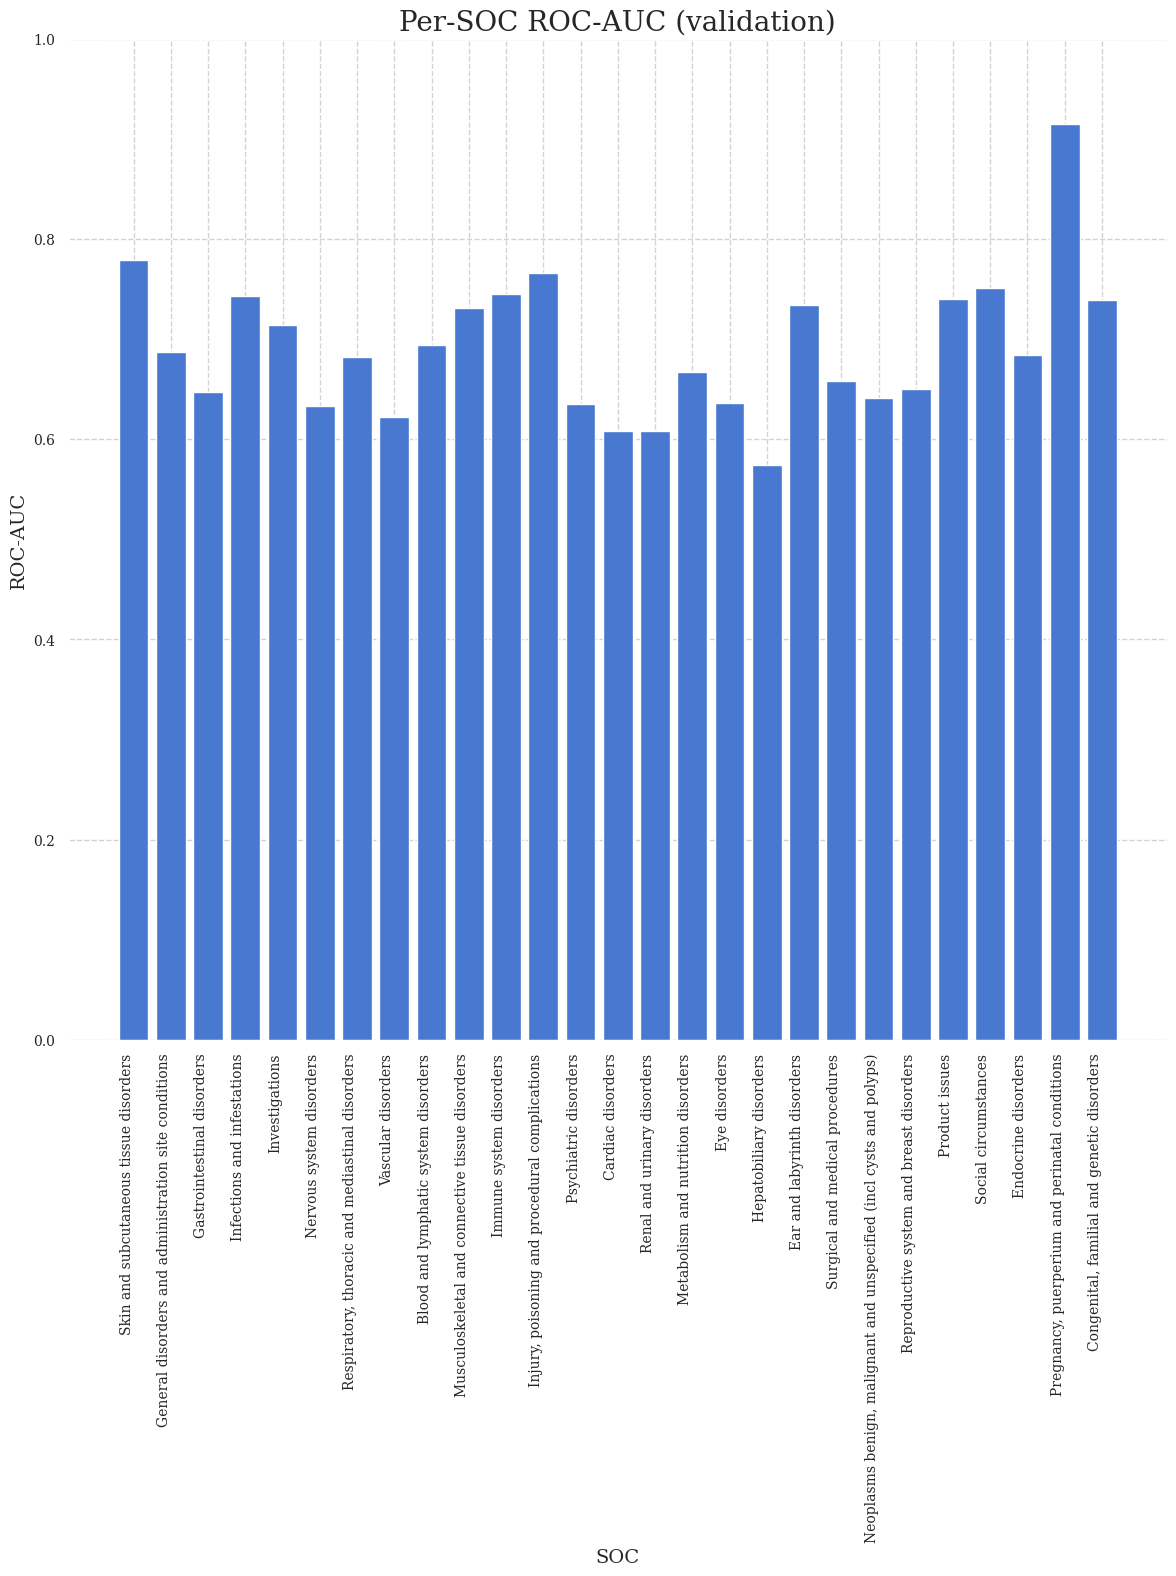

In [49]:
from sklearn.metrics import roc_auc_score

auc_per_soc = np.full(n_labels, np.nan)
for j in range(n_labels):
    y_true = Y_val_arr[:, j]
    p_hat = val_proba_mat[:, j]
    if len(np.unique(y_true)) < 2:
        continue
    auc_per_soc[j] = roc_auc_score(y_true, p_hat)

sorted_auc = auc_per_soc[idx]

fig, ax = plt.subplots(figsize=(12, 16))
ax.bar(np.arange(len(sorted_soc_names)), sorted_auc)
ax.set_ylabel("ROC-AUC")
ax.set_xlabel("SOC")
ax.set_title("Per-SOC ROC-AUC (validation)")
ax.set_xticks(np.arange(len(sorted_soc_names)))
ax.set_xticklabels(sorted_soc_names, rotation=90, ha="right")
ax.set_ylim(0.0, 1.0)
plt.tight_layout()
plt.show()


In [51]:
import pandas as pd
import numpy as np

target_soc = "Gastrointestinal disorders"
k = soc_cols.index(target_soc)

# estimator for this SOC
soc_est = multi_clf.estimators_[k]           # this is the Pipeline
logreg = soc_est.named_steps["clf"]          # LogisticRegression
# scaler = soc_est.named_steps["scaler"]     # exists if you need it

coefs = logreg.coef_[0]      # shape (n_features,)
intercept = logreg.intercept_[0]

coef_df = pd.DataFrame({
    "feature": feature_cols,
    "coef": coefs,
})
coef_df["abs_coef"] = coef_df["coef"].abs()
coef_df["odds_ratio"] = np.exp(coef_df["coef"])

# sort by magnitude
coef_df_sorted = coef_df.sort_values("abs_coef", ascending=False)
coef_df_sorted.head(20)


,feature,coef,abs_coef,odds_ratio
6267,alemtuzumab,1.050601,1.050601,2.859370
8067,verapamil,1.020006,1.020006,2.773213
1496,aloe vera,-0.960956,0.960956,0.382527
8241,azathioprine sodium,-0.854108,0.854108,0.425663
328,docusate sodium,-0.785611,0.785611,0.455841
7882,rabeprazole,0.779014,0.779014,2.179322
7569,frovatriptan,-0.761555,0.761555,0.466940
80,cefaloridine,0.751945,0.751945,2.121123
79,cephaloridine,-0.746444,0.746444,0.474049
501,magnesium hydroxide,-0.704475,0.704475,0.494368


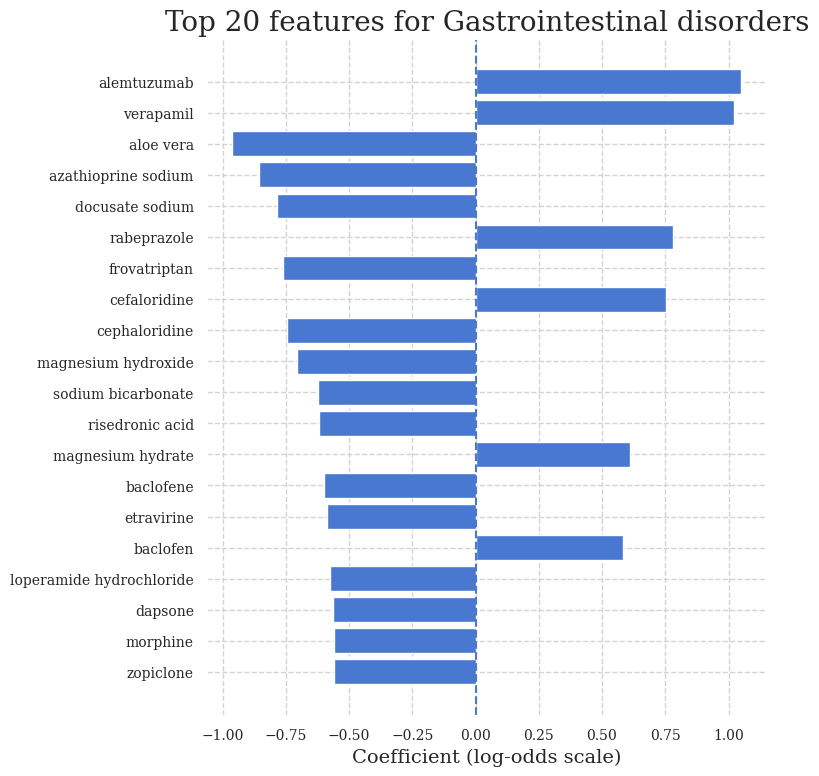

In [54]:
import matplotlib.pyplot as plt

top_k = 20  # number of strongest variables to show

top_soc = coef_df_sorted.head(top_k)

fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(top_soc["feature"], top_soc["coef"])
ax.axvline(0, linestyle="--")
ax.set_xlabel("Coefficient (log-odds scale)")
ax.set_title(f"Top {top_k} features for {target_soc}")
ax.invert_yaxis()  # strongest at top
plt.tight_layout()
plt.show()


In [57]:
# collect per-SOC coefficients into one matrix: shape (n_socs, n_features)
coef_mat = []
for soc_idx in range(len(soc_cols)):
    est = multi_clf.estimators_[soc_idx]
    logreg = est.named_steps["clf"]
    coef_mat.append(logreg.coef_[0])

coef_mat = np.vstack(coef_mat)  # K x p

# average absolute effect over SOCs
global_importance = coef_mat.abs().mean(axis=0)

global_imp_df = pd.DataFrame({
    "feature": feature_cols,
    "mean_abs_coef": global_importance,
}).sort_values("mean_abs_coef", ascending=False)

global_imp_df.head(20)


AttributeError: 'numpy.ndarray' object has no attribute 'abs'

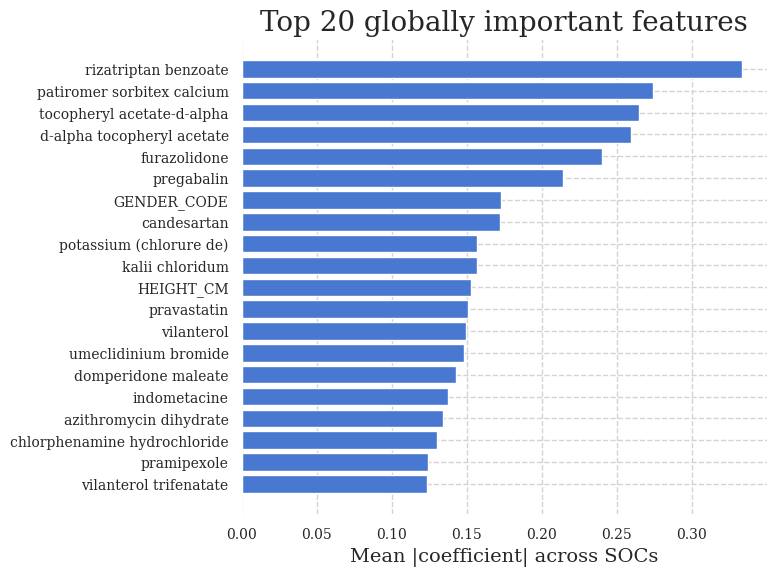

In [59]:
top_k = 20
top_global = global_imp_df.head(top_k)

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_global["feature"], top_global["mean_abs_coef"])
ax.set_xlabel("Mean |coefficient| across SOCs")
ax.set_title(f"Top {top_k} globally important features")
ax.invert_yaxis()
plt.tight_layout()
plt.show()


# Ejemplo

In [24]:
import numpy as np
import pandas as pd

# X_new: pandas DataFrame with same feature_cols
proba_per_soc = multi_clf.predict_proba(X_new)

# proba_per_soc is a list, one element per SOC
# convert to a 2D array: n_samples × n_socs

proba_matrix = np.column_stack([
    p[:, 1] for p in proba_per_soc  # P(Y_k=1 | X)
])

proba_df = pd.DataFrame(
    proba_matrix,
    columns=soc_cols,
    index=X_new.index,
)


In [1]:
X_new

NameError: name 'X_new' is not defined

In [25]:
proba_df

,Blood and lymphatic system disorders,Cardiac disorders,"Congenital, familial and genetic disorders",Ear and labyrinth disorders,Endocrine disorders,Eye disorders,Gastrointestinal disorders,General disorders and administration site conditions,Hepatobiliary disorders,Immune system disorders,...,"Pregnancy, puerperium and perinatal conditions",Product issues,Psychiatric disorders,Renal and urinary disorders,Reproductive system and breast disorders,"Respiratory, thoracic and mediastinal disorders",Skin and subcutaneous tissue disorders,Social circumstances,Surgical and medical procedures,Vascular disorders
0,9.359495e-09,2.837543e-06,9.839876e-06,1.616039e-04,3.265951e-12,9.108759e-01,0.041168,0.247322,1.066893e-05,8.381395e-04,...,1.208509e-09,4.360098e-09,7.063364e-01,6.503738e-01,8.264271e-06,0.636066,0.582142,1.180873e-06,2.760630e-03,0.049061
1,2.162675e-01,2.133588e-02,7.692946e-07,9.999795e-01,1.226721e-06,6.052443e-01,0.072756,0.456874,3.694367e-07,5.134247e-20,...,1.565349e-11,1.530144e-06,7.665174e-01,4.134360e-03,6.084534e-06,0.855940,0.400243,2.109616e-06,4.588045e-09,0.196461
2,1.356177e-04,1.347803e-06,2.135309e-08,9.242693e-10,3.715594e-07,3.217330e-04,0.208686,0.230282,1.759323e-09,1.661479e-04,...,9.231092e-11,4.695075e-03,4.206729e-01,9.007280e-07,1.587973e-06,0.001002,0.822312,6.920257e-04,7.205927e-09,0.353230
3,1.512731e-07,3.674810e-07,7.179256e-10,3.968487e-02,2.051404e-09,1.015518e-05,0.000001,0.035848,3.905102e-09,3.604199e-09,...,2.104373e-14,6.074086e-16,8.029296e-09,2.359391e-02,2.261647e-05,0.157831,0.828232,9.729290e-09,3.989686e-06,0.000185
4,5.330656e-02,3.756807e-01,1.035160e-05,6.153080e-01,1.117099e-05,4.600042e-01,0.466076,0.187350,1.090659e-02,1.994079e-09,...,2.990610e-07,5.729477e-03,3.757356e-01,6.098206e-01,4.070646e-03,0.183141,0.634025,1.089535e-03,5.943945e-04,0.322828
5,1.840922e-02,6.985725e-02,2.001890e-08,6.613884e-11,4.987292e-09,2.654745e-19,0.351738,0.275266,7.388362e-12,4.291953e-01,...,7.130731e-08,7.969455e-10,6.736457e-06,6.191040e-01,2.198199e-06,0.150896,0.660962,1.046392e-20,5.461326e-04,0.284288
6,1.791111e-05,7.375293e-04,3.237952e-08,6.978517e-07,5.446639e-07,7.547469e-04,0.059542,0.383401,5.151644e-01,7.677423e-17,...,5.016130e-20,1.044033e-09,3.010471e-01,1.448797e-01,8.420486e-14,0.058299,0.605243,9.104187e-07,7.276663e-17,0.721574
7,1.778315e-04,1.804080e-05,2.043963e-08,2.799264e-05,3.468395e-06,5.755117e-04,0.000478,0.000088,3.213088e-06,9.739810e-08,...,4.017843e-16,1.094195e-09,1.102411e-08,9.536903e-01,5.936078e-08,0.000117,0.341653,2.073280e-07,5.345686e-09,0.000328
8,5.867141e-08,2.010768e-08,9.124221e-21,5.811265e-09,3.570495e-11,1.392665e-07,0.000211,0.000314,4.142202e-17,7.752994e-13,...,3.364544e-28,2.130463e-15,1.006361e-07,7.317141e-01,1.048247e-19,0.000239,0.753493,1.462497e-06,7.352870e-16,0.000120
9,4.923880e-04,1.931262e-05,1.184338e-13,1.124940e-10,1.455080e-09,1.068695e-05,0.210530,0.227731,1.413346e-08,6.977552e-18,...,3.823225e-13,5.200002e-21,9.828381e-01,8.275136e-03,1.736784e-17,0.112520,0.593937,1.648862e-13,4.704959e-11,0.014920
